In [4]:
# Run this cell to install required packages
!pip install pandas numpy matplotlib seaborn scikit-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Creating datasets...

Email Security Classification Dataset:
Shape: (100, 6)


,Email_Size_KB,Num_Recipients,Num_Links,Num_Attachments,Sender_Domain_Age_Days,Class
0,15,1,0,0,500,Normal
1,1200,50,5,1,300,Newsletter
2,50,3,2,3,800,Business
3,300,5,10,0,5,Suspicious
4,10,100,25,2,1,Malicious



Malware Behavior Analysis Dataset:
Shape: (100, 6)


,System_Calls_Per_Minute,File_Operations_Count,Network_Connections,Registry_Modifications,Memory_Usage_MB,Class
0,5,10,2,0,50,Benign
1,300,500,100,200,500,Ransomware
2,50,150,5,10,150,Adware
3,150,50,50,5,300,Trojan
4,20,300,1,100,200,Cryptominer



Building Email Security Classification Model...
Email Security Classification Model Evaluation:
----------------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

    Business       1.00      1.00      1.00         7
   Malicious       1.00      1.00      1.00         8
  Newsletter       1.00      1.00      1.00         6
      Normal       1.00      1.00      1.00         4
  Suspicious       1.00      1.00      1.00         5

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



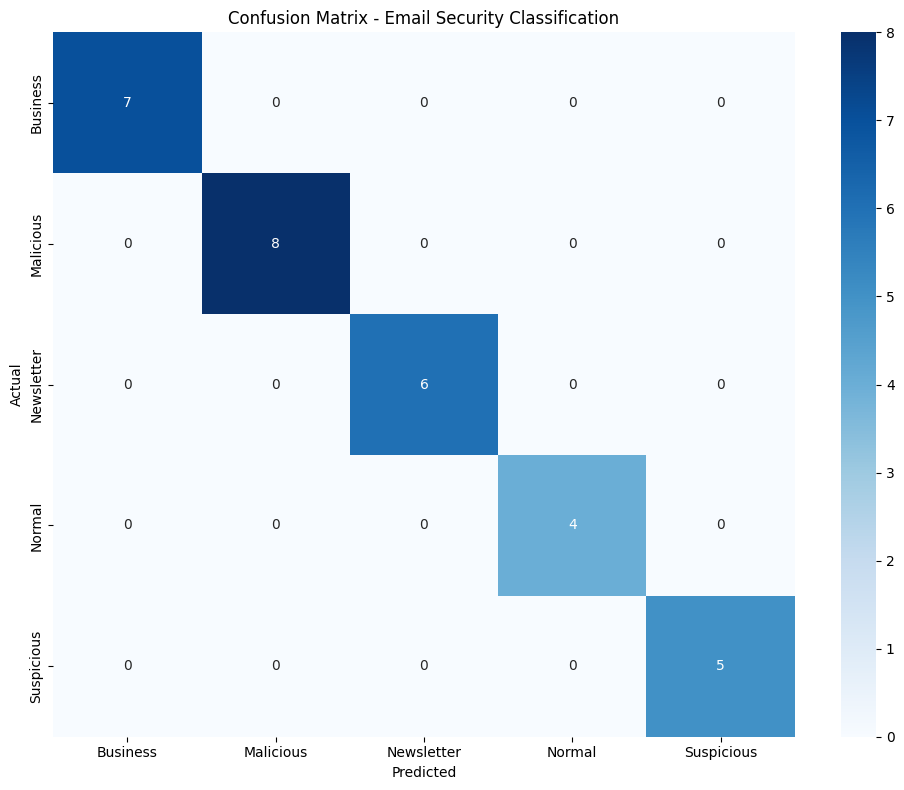

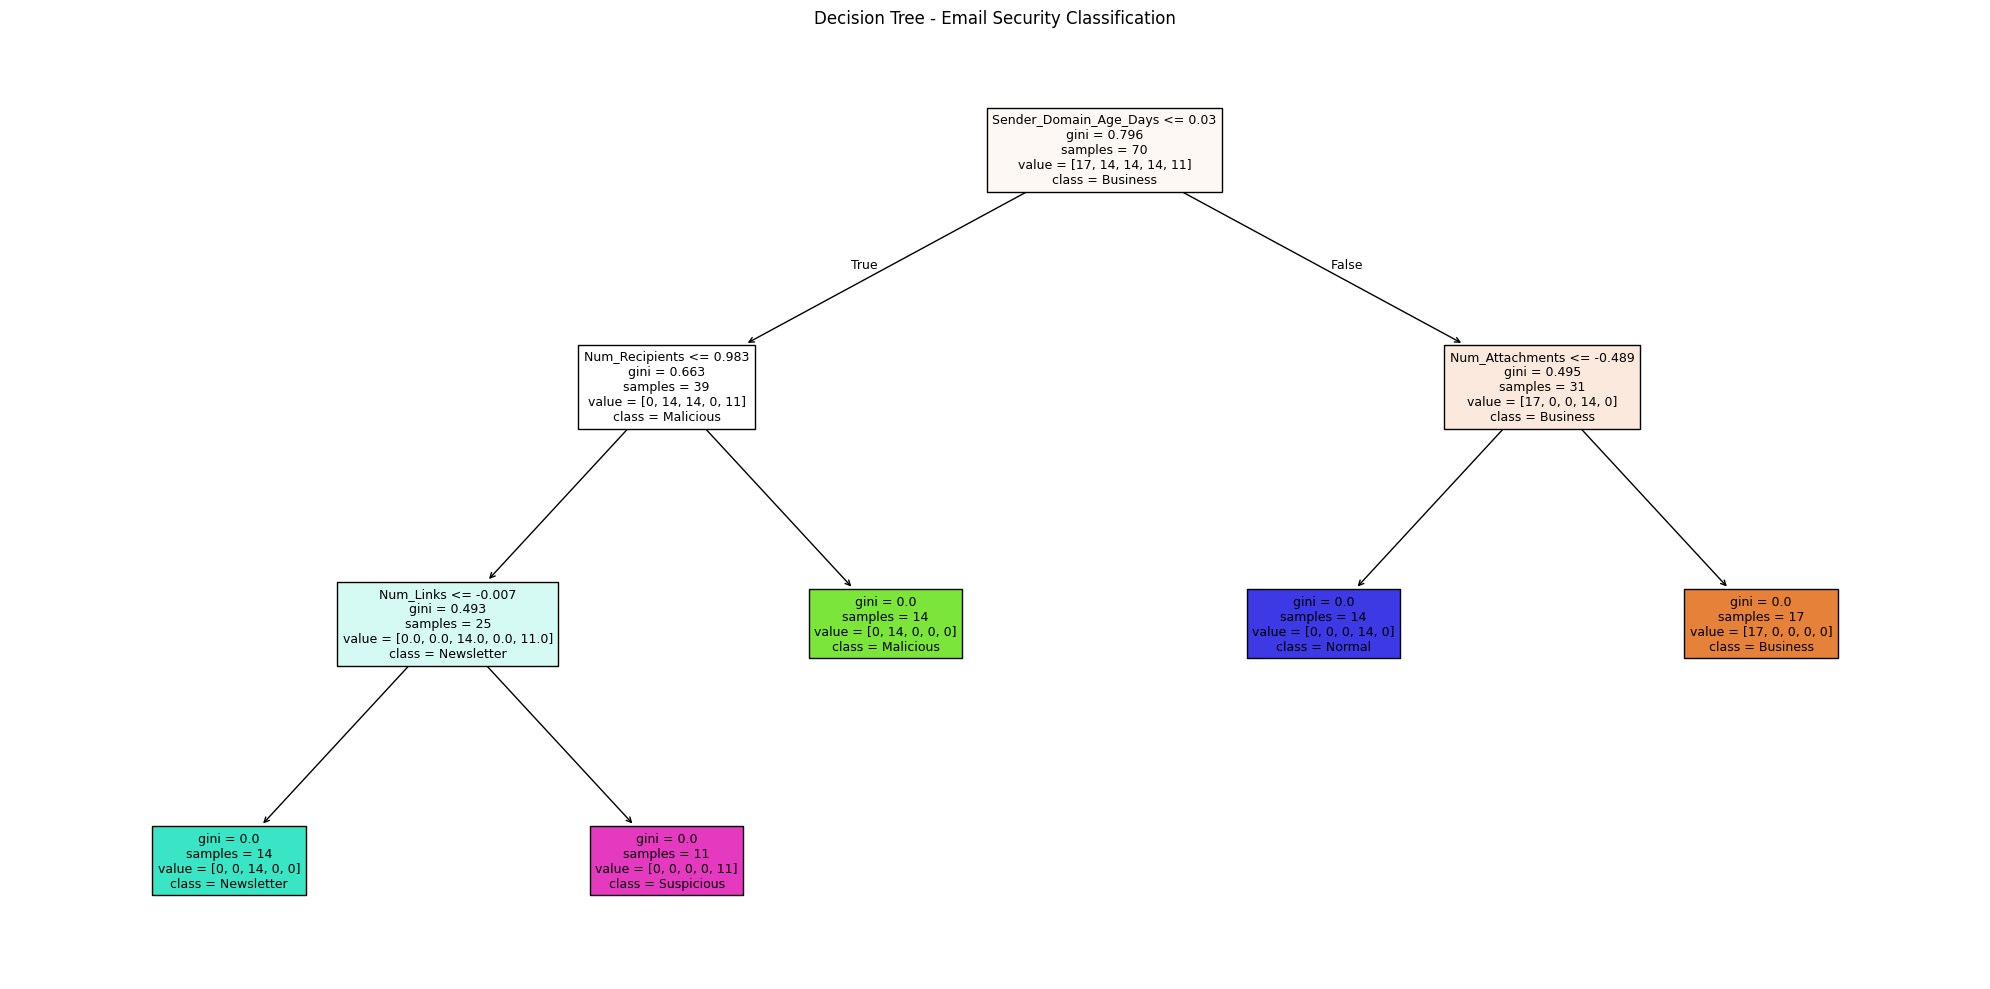


Building Malware Behavior Analysis Model...

Malware Behavior Analysis Model Evaluation:
-----------------------------------
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Adware       1.00      1.00      1.00         2
      Benign       1.00      1.00      1.00         7
 Cryptominer       1.00      1.00      1.00        10
  Ransomware       1.00      1.00      1.00         4
      Trojan       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



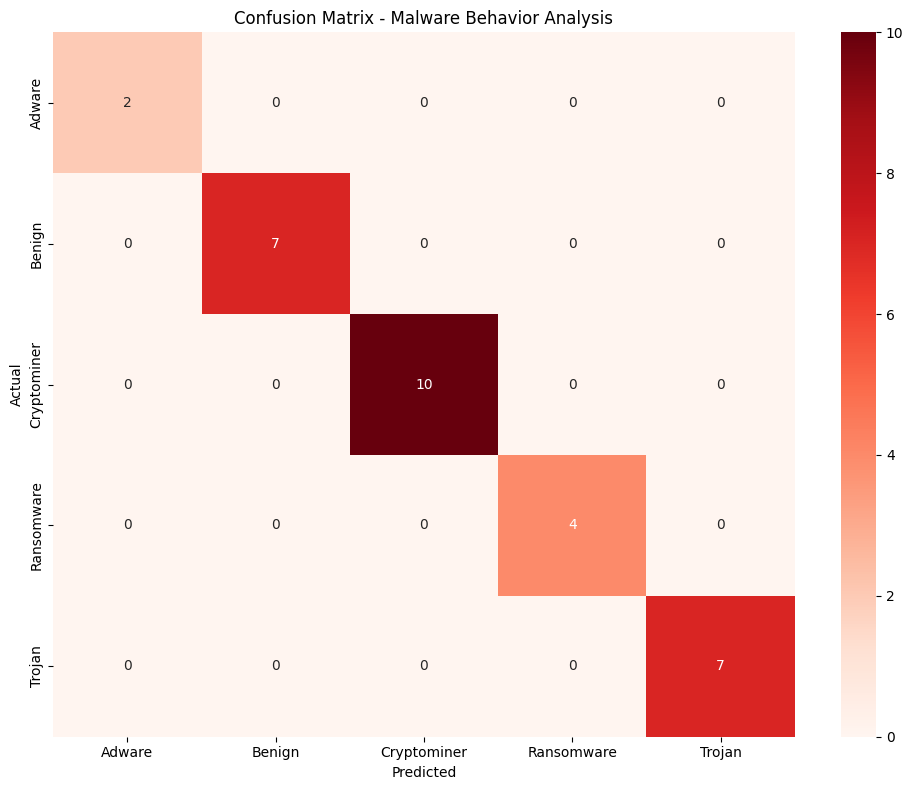

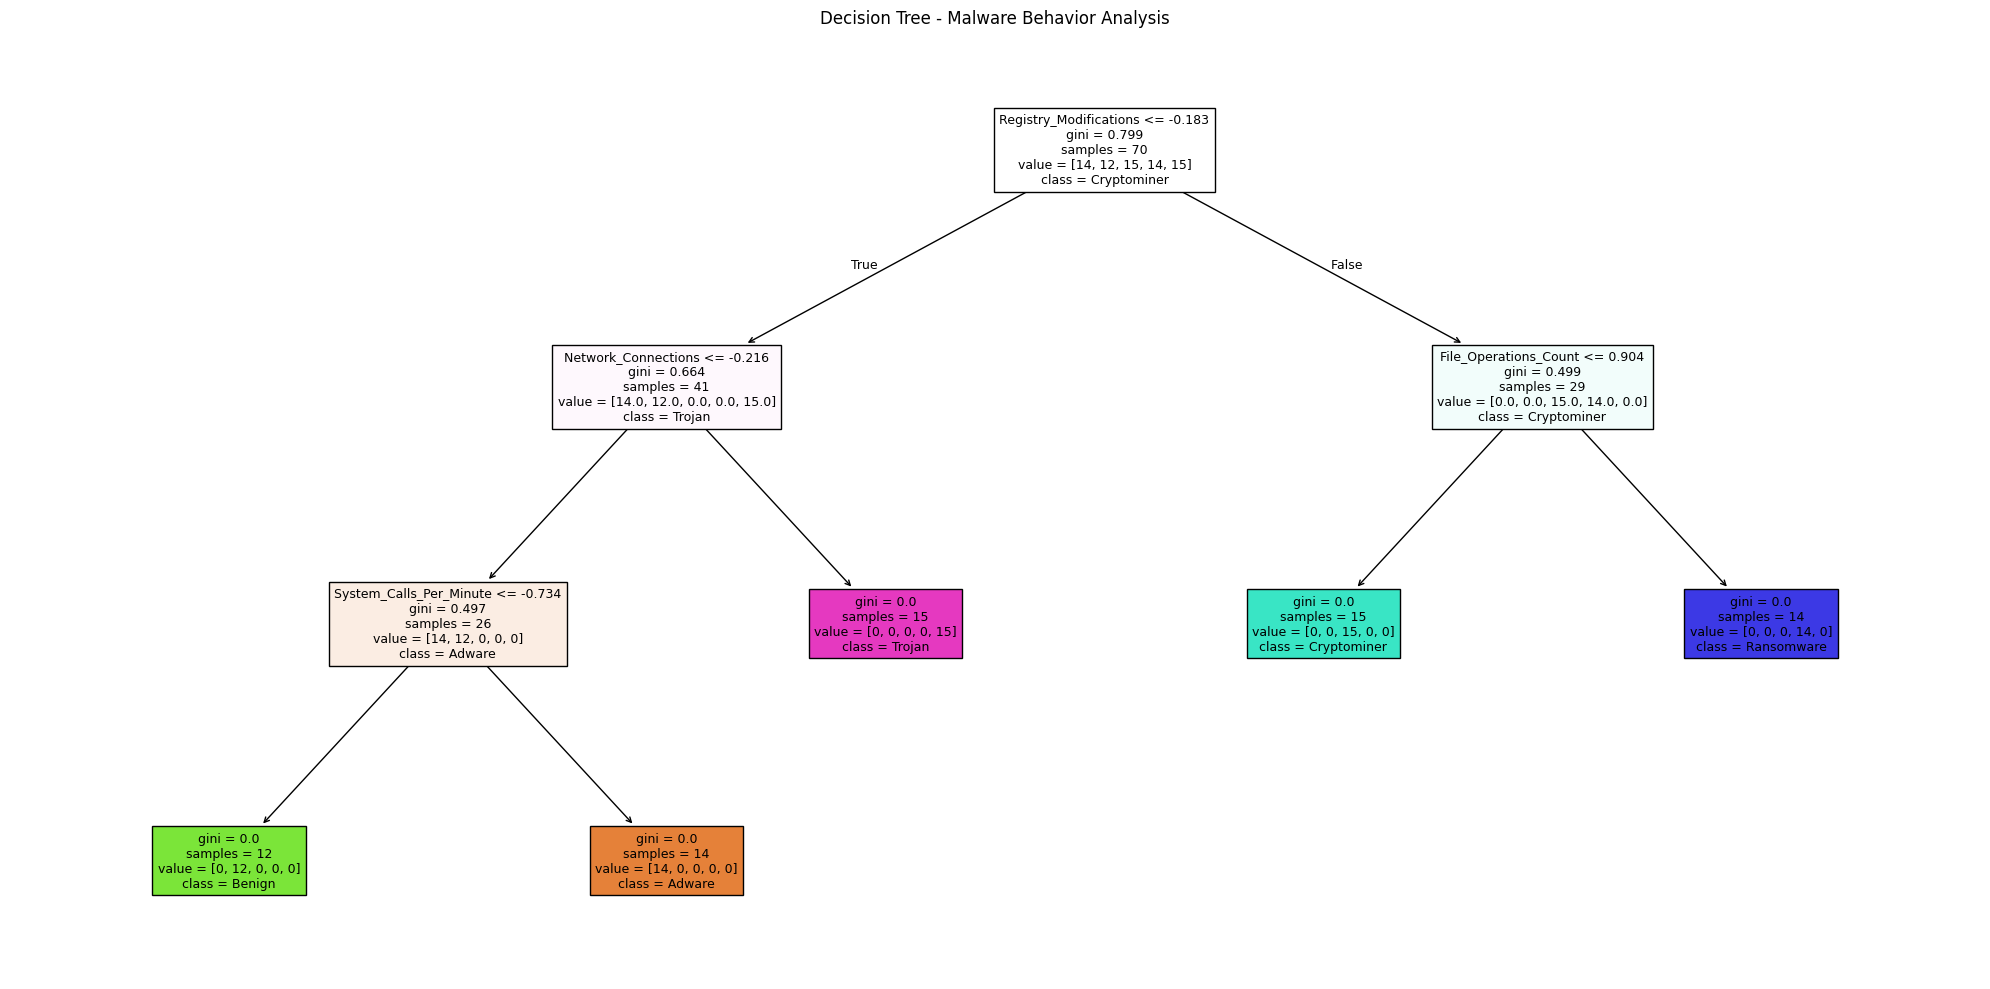


Email Security Classification Feature Importance:


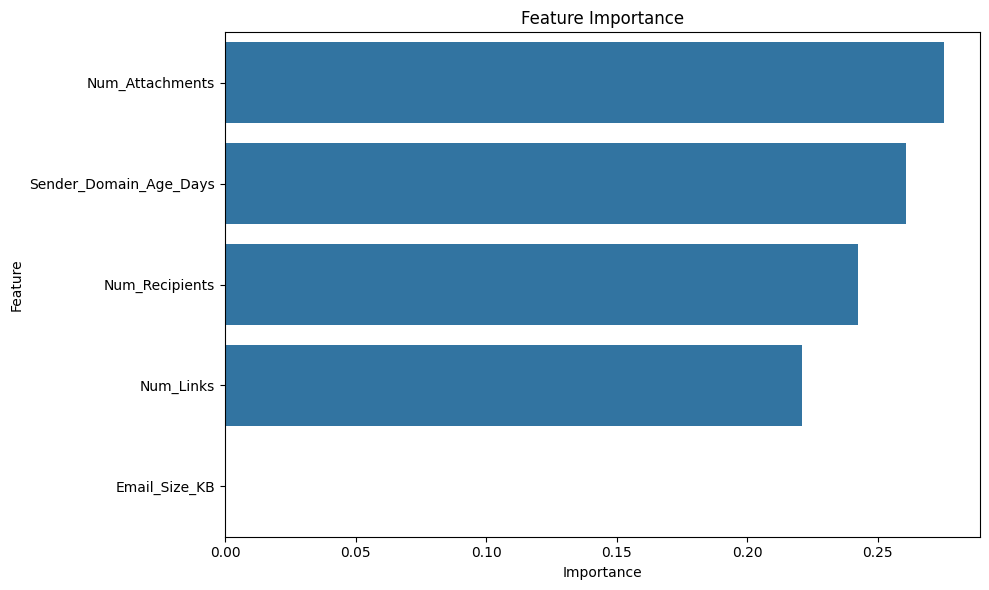

,Feature,Importance
0,Num_Attachments,0.275458
1,Sender_Domain_Age_Days,0.260874
2,Num_Recipients,0.242653
3,Num_Links,0.221015
4,Email_Size_KB,0.000000



Malware Behavior Analysis Feature Importance:


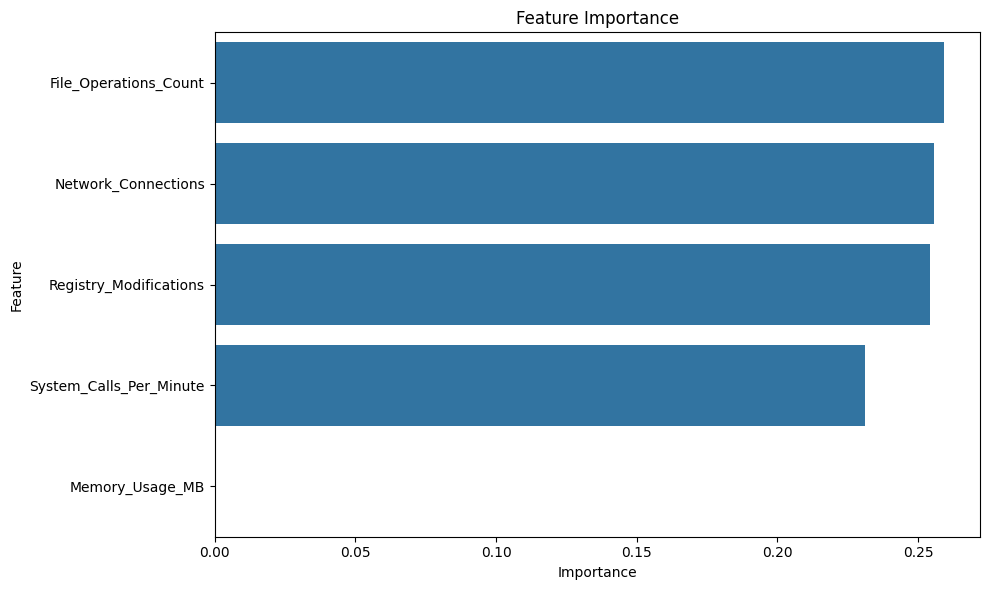

,Feature,Importance
0,File_Operations_Count,0.259017
1,Network_Connections,0.255685
2,Registry_Modifications,0.254175
3,System_Calls_Per_Minute,0.231123
4,Memory_Usage_MB,0.000000



Example Predictions:
Predicted Email Security Class: Normal
Predicted Malware Type: Ransomware


In [6]:
# Function to create email security classification data
def create_email_security_data():
    # Create sample data based on email security metrics
    data = {
        'Email_Size_KB': [15, 1200, 50, 300, 10, 18, 1300, 45, 320, 12, 16, 1250, 55, 290, 9],
        'Num_Recipients': [1, 50, 3, 5, 100, 2, 45, 4, 6, 120, 1, 60, 3, 4, 90],
        'Num_Links': [0, 5, 2, 10, 25, 1, 4, 3, 8, 30, 0, 6, 2, 9, 20],
        'Num_Attachments': [0, 1, 3, 0, 2, 0, 1, 2, 0, 1, 0, 2, 3, 0, 2],
        'Sender_Domain_Age_Days': [500, 300, 800, 5, 1, 450, 320, 750, 8, 2, 520, 280, 820, 3, 1],
        'Class': ['Normal', 'Newsletter', 'Business', 'Suspicious', 'Malicious',
                 'Normal', 'Newsletter', 'Business', 'Suspicious', 'Malicious',
                 'Normal', 'Newsletter', 'Business', 'Suspicious', 'Malicious']
    }
    
    # Add more synthetic data points to better train the model
    np.random.seed(42)
    for _ in range(85):  # Add more data points
        class_type = np.random.choice(['Normal', 'Newsletter', 'Business', 'Suspicious', 'Malicious'])
        
        # Create feature values according to class patterns
        if class_type == 'Normal':
            data['Email_Size_KB'].append(np.random.randint(10, 30))
            data['Num_Recipients'].append(np.random.randint(1, 3))
            data['Num_Links'].append(np.random.randint(0, 2))
            data['Num_Attachments'].append(np.random.randint(0, 1))
            data['Sender_Domain_Age_Days'].append(np.random.randint(400, 1000))
            
        elif class_type == 'Newsletter':
            data['Email_Size_KB'].append(np.random.randint(1000, 1500))
            data['Num_Recipients'].append(np.random.randint(40, 80))
            data['Num_Links'].append(np.random.randint(3, 8))
            data['Num_Attachments'].append(np.random.randint(0, 2))
            data['Sender_Domain_Age_Days'].append(np.random.randint(200, 400))
            
        elif class_type == 'Business':
            data['Email_Size_KB'].append(np.random.randint(40, 100))
            data['Num_Recipients'].append(np.random.randint(2, 5))
            data['Num_Links'].append(np.random.randint(1, 4))
            data['Num_Attachments'].append(np.random.randint(1, 4))
            data['Sender_Domain_Age_Days'].append(np.random.randint(600, 1000))
            
        elif class_type == 'Suspicious':
            data['Email_Size_KB'].append(np.random.randint(250, 350))
            data['Num_Recipients'].append(np.random.randint(4, 8))
            data['Num_Links'].append(np.random.randint(7, 15))
            data['Num_Attachments'].append(np.random.randint(0, 1))
            data['Sender_Domain_Age_Days'].append(np.random.randint(2, 10))
            
        else:  # Malicious
            data['Email_Size_KB'].append(np.random.randint(5, 15))
            data['Num_Recipients'].append(np.random.randint(80, 150))
            data['Num_Links'].append(np.random.randint(15, 35))
            data['Num_Attachments'].append(np.random.randint(1, 3))
            data['Sender_Domain_Age_Days'].append(np.random.randint(1, 3))
            
        data['Class'].append(class_type)
    
    return pd.DataFrame(data)

# Function to create malware behavior analysis data
def create_malware_behavior_data():
    # Create sample data based on malware behavior metrics
    data = {
        'System_Calls_Per_Minute': [5, 300, 50, 150, 20, 8, 280, 45, 160, 25],
        'File_Operations_Count': [10, 500, 150, 50, 300, 15, 450, 140, 60, 290],
        'Network_Connections': [2, 100, 5, 50, 1, 3, 90, 6, 45, 2],
        'Registry_Modifications': [0, 200, 10, 5, 100, 1, 180, 15, 8, 90],
        'Memory_Usage_MB': [50, 500, 150, 300, 200, 60, 450, 160, 280, 220],
        'Class': ['Benign', 'Ransomware', 'Adware', 'Trojan', 'Cryptominer',
                 'Benign', 'Ransomware', 'Adware', 'Trojan', 'Cryptominer']
    }
    
    # Add more synthetic data points
    np.random.seed(42)
    for _ in range(90):  # Add more data points
        class_type = np.random.choice(['Benign', 'Ransomware', 'Adware', 'Trojan', 'Cryptominer'])
        
        # Create feature values according to class patterns
        if class_type == 'Benign':
            data['System_Calls_Per_Minute'].append(np.random.randint(2, 15))
            data['File_Operations_Count'].append(np.random.randint(5, 30))
            data['Network_Connections'].append(np.random.randint(1, 5))
            data['Registry_Modifications'].append(np.random.randint(0, 3))
            data['Memory_Usage_MB'].append(np.random.randint(30, 100))
            
        elif class_type == 'Ransomware':
            data['System_Calls_Per_Minute'].append(np.random.randint(250, 350))
            data['File_Operations_Count'].append(np.random.randint(400, 600))
            data['Network_Connections'].append(np.random.randint(80, 120))
            data['Registry_Modifications'].append(np.random.randint(150, 250))
            data['Memory_Usage_MB'].append(np.random.randint(400, 600))
            
        elif class_type == 'Adware':
            data['System_Calls_Per_Minute'].append(np.random.randint(40, 70))
            data['File_Operations_Count'].append(np.random.randint(100, 200))
            data['Network_Connections'].append(np.random.randint(3, 8))
            data['Registry_Modifications'].append(np.random.randint(5, 20))
            data['Memory_Usage_MB'].append(np.random.randint(100, 200))
            
        elif class_type == 'Trojan':
            data['System_Calls_Per_Minute'].append(np.random.randint(120, 180))
            data['File_Operations_Count'].append(np.random.randint(30, 70))
            data['Network_Connections'].append(np.random.randint(40, 60))
            data['Registry_Modifications'].append(np.random.randint(3, 10))
            data['Memory_Usage_MB'].append(np.random.randint(250, 350))
            
        else:  # Cryptominer
            data['System_Calls_Per_Minute'].append(np.random.randint(15, 30))
            data['File_Operations_Count'].append(np.random.randint(250, 350))
            data['Network_Connections'].append(np.random.randint(1, 3))
            data['Registry_Modifications'].append(np.random.randint(80, 120))
            data['Memory_Usage_MB'].append(np.random.randint(150, 250))
            
        data['Class'].append(class_type)
    
    return pd.DataFrame(data)

# Function to build and evaluate the email security classification model
def build_email_security_model(df):
    # Prepare the features and target
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate the model
    print("Email Security Classification Model Evaluation:")
    print("----------------------------------------")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title('Confusion Matrix - Email Security Classification')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('email_security_confusion_matrix.png')
    plt.show()  # Add this to display in notebook
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=9)
    plt.title('Decision Tree - Email Security Classification')
    plt.tight_layout()
    plt.savefig('email_security_tree.png')
    plt.show()  # Add this to display in notebook
    
    return clf, scaler

# Function to build and evaluate the malware behavior analysis model
def build_malware_behavior_model(df):
    # Prepare the features and target
    X = df.drop('Class', axis=1)
    y = df['Class']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Train the decision tree model
    clf = DecisionTreeClassifier(max_depth=5, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test_scaled)
    
    # Evaluate the model
    print("\nMalware Behavior Analysis Model Evaluation:")
    print("-----------------------------------")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=clf.classes_, yticklabels=clf.classes_)
    plt.title('Confusion Matrix - Malware Behavior Analysis')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('malware_behavior_confusion_matrix.png')
    plt.show()  # Add this to display in notebook
    
    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=9)
    plt.title('Decision Tree - Malware Behavior Analysis')
    plt.tight_layout()
    plt.savefig('malware_behavior_tree.png')
    plt.show()  # Add this to display in notebook
    
    return clf, scaler

# Function to make predictions on new data
def predict_email_security(model, scaler, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Make prediction
    prediction = model.predict(new_data_scaled)
    
    return prediction

def predict_malware_behavior(model, scaler, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    
    # Make prediction
    prediction = model.predict(new_data_scaled)
    
    return prediction

# Function to display feature importance
def display_feature_importance(model, feature_names):
    # Get feature importance
    importances = model.feature_importances_
    
    # Sort feature importance indices
    indices = np.argsort(importances)[::-1]
    
    # Create a DataFrame for better visualization
    feature_importance_df = pd.DataFrame({
        'Feature': [feature_names[i] for i in indices],
        'Importance': [importances[i] for i in indices]
    })
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.savefig('feature_importance.png')
    plt.show()  # Add this to display in notebook
    
    return feature_importance_df

# Main function to run the entire pipeline
def main():
    # Create the datasets
    print("Creating datasets...")
    email_df = create_email_security_data()
    malware_df = create_malware_behavior_data()
    
    # Display dataset info
    print("\nEmail Security Classification Dataset:")
    print(f"Shape: {email_df.shape}")
    display(email_df.head())  # Better display in Jupyter
    
    print("\nMalware Behavior Analysis Dataset:")
    print(f"Shape: {malware_df.shape}")
    display(malware_df.head())  # Better display in Jupyter
    
    # Build and evaluate the models
    print("\nBuilding Email Security Classification Model...")
    email_model, email_scaler = build_email_security_model(email_df)
    
    print("\nBuilding Malware Behavior Analysis Model...")
    malware_model, malware_scaler = build_malware_behavior_model(malware_df)
    
    # Display feature importance
    print("\nEmail Security Classification Feature Importance:")
    email_importance = display_feature_importance(email_model, email_df.drop('Class', axis=1).columns)
    display(email_importance)  # Better display in Jupyter
    
    print("\nMalware Behavior Analysis Feature Importance:")
    malware_importance = display_feature_importance(malware_model, malware_df.drop('Class', axis=1).columns)
    display(malware_importance)  # Better display in Jupyter
    
    # Example of making predictions
    print("\nExample Predictions:")
    
    # Email security classification example
    new_email_data = pd.DataFrame({
        'Email_Size_KB': [20],
        'Num_Recipients': [2],
        'Num_Links': [1],
        'Num_Attachments': [0],
        'Sender_Domain_Age_Days': [700]
    })
    
    email_prediction = predict_email_security(email_model, email_scaler, new_email_data)
    print(f"Predicted Email Security Class: {email_prediction[0]}")
    
    # Malware behavior analysis example
    new_malware_data = pd.DataFrame({
        'System_Calls_Per_Minute': [280],
        'File_Operations_Count': [450],
        'Network_Connections': [95],
        'Registry_Modifications': [200],
        'Memory_Usage_MB': [520]
    })
    
    malware_prediction = predict_malware_behavior(malware_model, malware_scaler, new_malware_data)
    print(f"Predicted Malware Type: {malware_prediction[0]}")

# Run the main function
if __name__ == "__main__":
    main()